In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re

In [2]:
def get_this(name):
    try:    
        exp = re.compile(f"[{name}]*")
        dirc = os.path.abspath(os.path.pardir)
        path = os.path.join(dirc,"ML","datasets")
        lsdir = os.listdir(path)
        file = [x for x in lsdir if re.search(exp,x)]
        return os.path.join(path,file[0])
    except Exception as err:
        return err

In [21]:
file = get_this('student')
df = pd.read_csv(file)
df.describe()
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


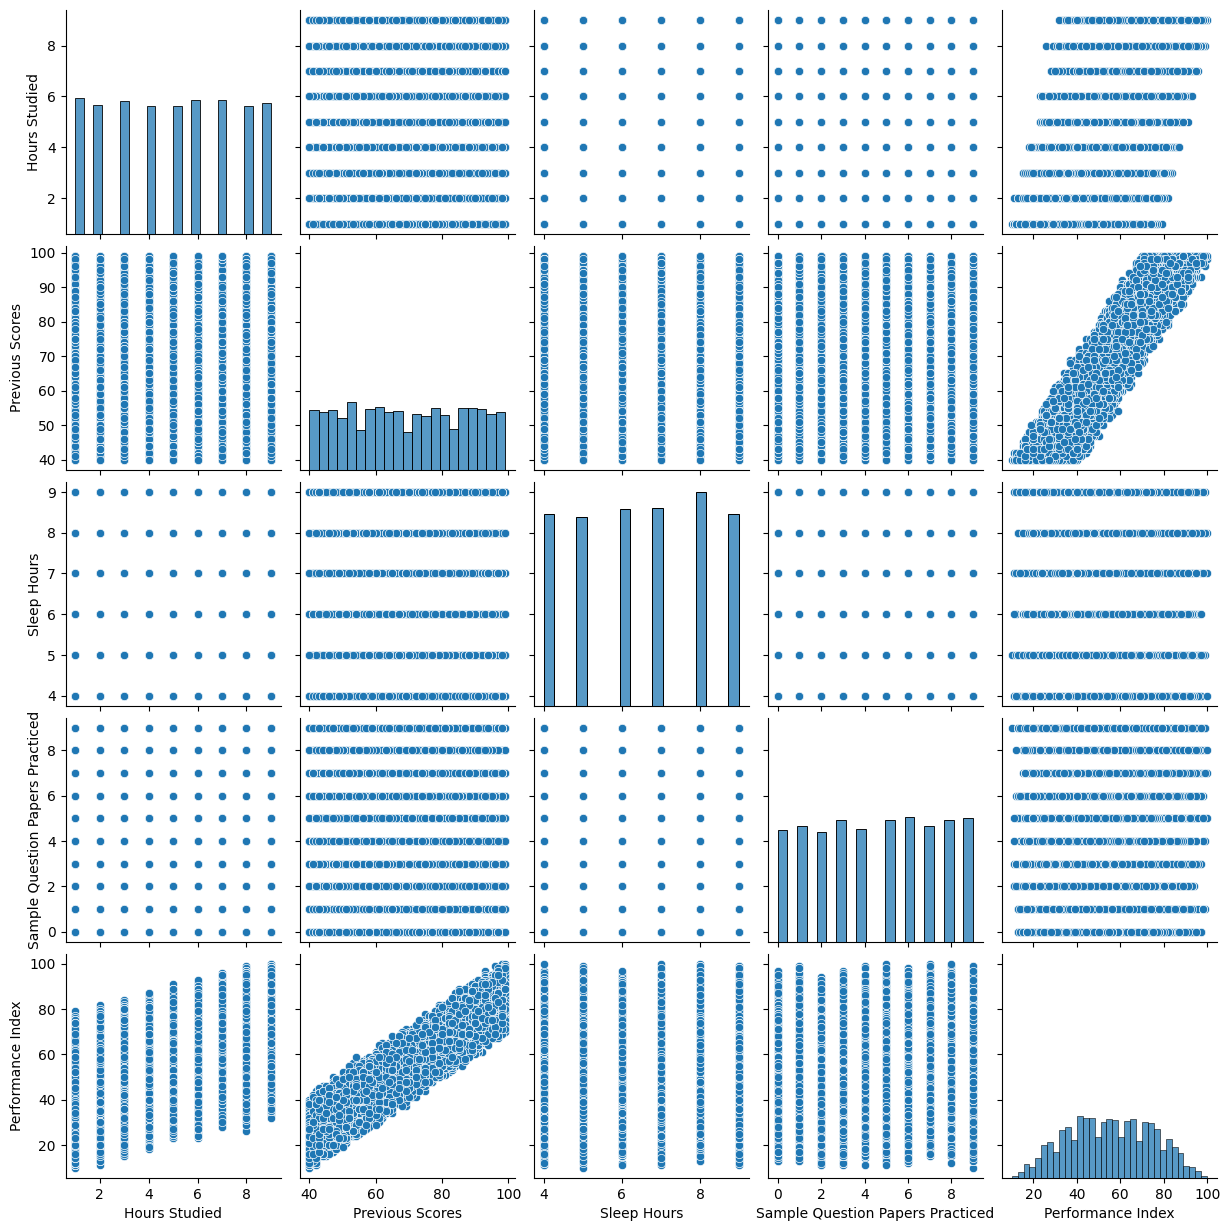

In [11]:
df.drop_duplicates(inplace=True)
# df['Extracurricular Activities'] = np.where(df['Extracurricular Activities'] == "Yes", 1,0)
df = df.drop(columns='Extracurricular Activities')
df.columns
_train = df.sample(frac=0.8,random_state=200)
_test = df.drop(_train.index)
sns.pairplot(df)

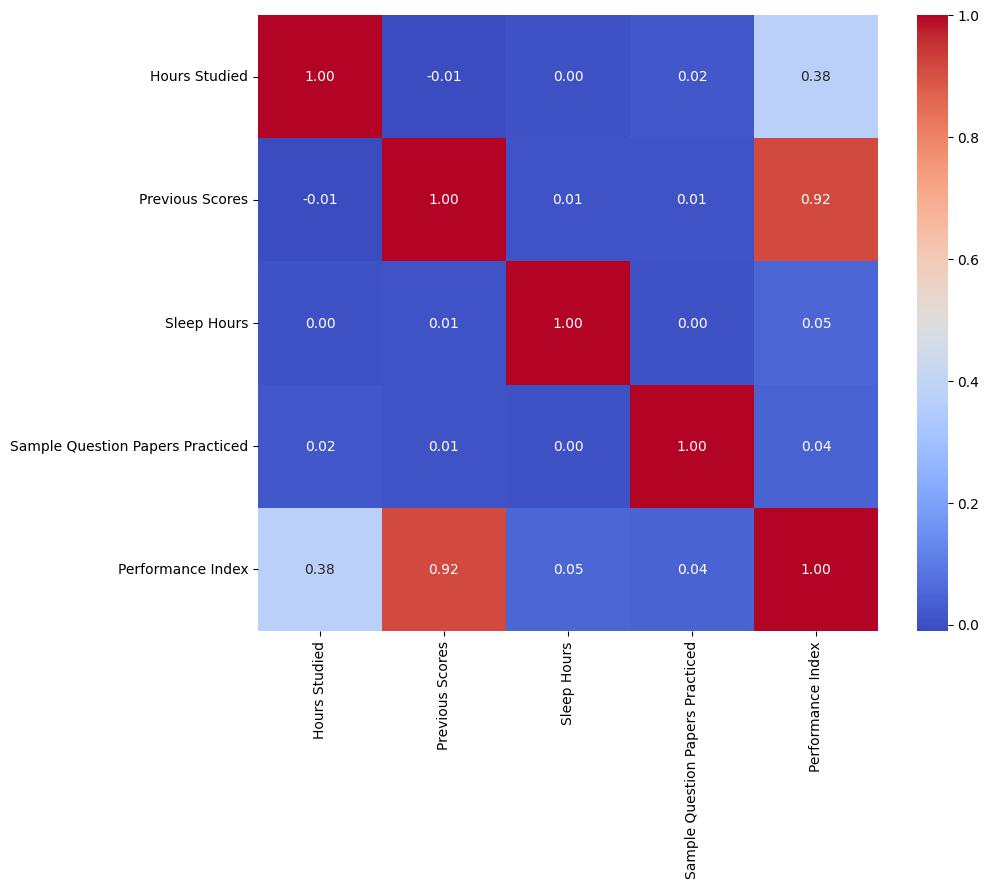

Performance Index                   1.000000
Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Name: Performance Index, dtype: float64


In [14]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Extract the correlations with the target variable
target_corr = corr_matrix["Performance Index"].sort_values(ascending=False)
print(target_corr)
